## Plot OOI DAS data in Julia

- experiment description: https://oceanobservatories.org/2022/02/distributed-acoustic-sensing-lays-groundwork-for-earthquake-tsunami-warnings-and-more/
- Silixa DAS interrogator
- Yiyu Ni (niyiyu@uw.edu)
- Nov 1, 2022
- Dept. of Earth and Space Sciences
- University of Washington

In [60]:
# instead of using "import", Julia use "using" to load packages
using SeisNoise, SeisIO, HDF5, PyPlot

In [54]:
# note that strings in Julia should strictly use "" (double quote)
# only char allows single quote

fname = "/data/wsd01/South-C1-LR-95km-P1kHz-GL50m-SP2m-FS200Hz_2021-11-01T231114Z.h5"
fid = h5open(fname, "r")
data = read(fid, "/Acquisition/Raw[0]/RawData")
timestamp = read(fid, "/Acquisition/Raw[0]/RawDataTime") / 1000000
close(fid)

# note that in python, the array has shape of (47500, 12000)
println(size(data))

(12000, 47500)


In [61]:
# natively create a matrix of shape (12000, 47500) of 32bit float type
filt_normdata = zeros(Float32, 12000, 47500)

for i in 1:47500
    # note how dot "." is used for an operation between a matrix and a float
    filt_normdata[:, i] = (data[:, i] .- minimum(data[:, i])) / (maximum(data[:, i]) .- minimum(data[:, i]))
end

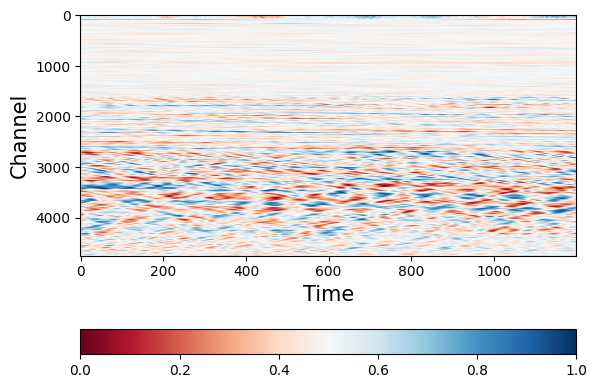

PyObject <matplotlib.colorbar.Colorbar object at 0x7fe93d260df0>

In [85]:
downsample_space=10
downsample_time=10

# slicing a vector has different grammar. start:stride:end
imshow(transpose(filt_normdata[1:downsample_space:end,1:downsample_time:end]), 
               aspect = "auto", cmap = "RdBu")

xlabel("Time", fontsize = 15)
ylabel("Channel", fontsize = 15)
colorbar(location = "bottom", pad = 0.2)